# Features and feature representations

In this notebook (and lecture) we will learn about features for data exploration and machine learning.

## Resources

* 10 Minutes to pandas¶: [https://pandas.pydata.org/pandas-docs/stable/10min.html]
* codebasics: Python Pandas Tutorial: [https://www.youtube.com/playlist?list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy]

## Learning objectives

You should be able to:

* understand the importance of features in machine learning;
* understand the difference between types of features;
* load data from different sources;
* perform feature extraction from raw sources;
* understand the nature of the data via simple statistics.

## What is a feature?

A feature is defined as a specific, measurable characteristic of an instance.

### Feature extraction

* Raw input to feature vector
* $X \rightarrow \phi(x) \rightarrow \mathbb{R}^d$ where $d$ is the dimensionality of the feature vector

## Types of features

* **Numeric**
    * Discrete: (0, 1, 2, ...) or continuous (0.005, 2.998, ...)
* **Categorical**: a numeric assignment is meaningless
    * Colour: yellow, blue, orage
    * Day of week: Monday, Tuesday, ...
* **Ordinal**
    * Likert scale (0 = disagree, 6 = agree)

## Example features

Question: What is the *type* of each of the following features?

* A text document
    * The number of paragraphs
    * The number of times the word *machine* appears
* A dog
    * Fur length
    * Colour
    * Tail length
    * Height
* A mushroom
    * The presense of gills
    * Cap diameter

## What makes a good feature?

* Informative/discriminative: the feature helps us decide the class or group of an instance
* Independent: the feature is not correlated with other features

## Feature extraction

* How do we choose features?
* How do we extract them efficiently?

### Example: Iris dataset

In [1]:
# Standard imports for pandas and sklearn sample datasets
import pandas as pd
from sklearn import datasets

# Load the iris data
iris_data = datasets.load_iris()

# Convert it to a pandas DataFrame
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# A summary of the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Discussion: What kind of features are these? How were these features extracted?

## Feature representations

* We represent an instance with a *feature vector*

In [64]:
# Use slices to show the second row (feature vector)
df[2:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,4.7,3.2,1.3,0.2


In [63]:
# Or alternatively
df.iloc[2]

sepal length (cm)    4.7
sepal width (cm)     3.2
petal length (cm)    1.3
petal width (cm)     0.2
Name: 2, dtype: float64

In [51]:
# Show the sample (feature vector) with the largest petal length
df[:][df['petal length (cm)']==df['petal length (cm)'].max()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3


In [73]:
# Show samples (feature vectors) with petal lengths larger than 6cm
df[df['petal length (cm)'] > 6.0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
105,7.6,3.0,6.6,2.1
107,7.3,2.9,6.3,1.8
109,7.2,3.6,6.1,2.5
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3
122,7.7,2.8,6.7,2.0
130,7.4,2.8,6.1,1.9
131,7.9,3.8,6.4,2.0
135,7.7,3.0,6.1,2.3


* Multiple instances are combined into a *feature matrix* (a *DataFrame* in pandas), where each instance is a row, and each column is a feature.

In [33]:
# Show the number of rows and columns in the DataFrame 
df.shape

(150, 4)

### Discussion

1. How many instances in the iris dataset? How many features?
    * More complex representations possible (e.g., hierarchical), but many ML algorithms expect data in a matrix format (rows = instances, columns = features).

2. How can we represent a corpus of text documents? For example, all Wikipedia pages?

3. How can we represent a corpus of images, each of size 800x600 @ 24bpp (bits per pixel)?

4. What about audio samples? What if the samples are of different lengths?

5. What about video?

## Missing data

Data collection and feature extraction is not a perfect process; a lot of data may be missing.

Missing values can be caused by:

* Non-response (no data reported for a feature or instance)
* Attrition (diminishing response over longitudinal studies)
* Failure to report
* Errors in data collection or feature extraction

### Dealing with missing data

* Imputation (filling in), interpolation
* Machine learning (e.g., topic modeling)

### Data sparsity

A lot of data is *sparse*, meaning there are a lot of missing values.

* Netflix film ratings example: assume 100,000 films/TV series and 130,000,000 subscribers. If we want to store a rating between 0-10 for each user and each film, how much storage do we need?
* Now assume that an average user rates 200 films. What percentage of our data will consist of unrated films?
* Discuss the storage implications.

# Text corpus example (20 newsgroups)

The 20 newsgroups dataset is roughly 18000 newsgroup posts in 20 topics.

We will loosely follow the example here:

scikit-learn 20 newsgroups text data set: [http://scikit-learn.org/stable/datasets/twenty_newsgroups.html]

## Relevant resources

* [http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html]
* [http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html]

In [18]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes')) # all, train, test
# List the categories (topics)
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [25]:
# Feature extraction with the sklearn TF-IDF vectoriser
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
vectorizer = TfidfVectorizer()
#vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(newsgroups.data)
# Show the shape of the term-document matrix in format (document, word)
vectors.shape

(18846, 134410)

In [26]:
# How sparse is the term-document matrix? (%)
vectors.nnz / float(vectors.shape[0]*vectors.shape[1]) * 100.0

0.07130067967636976

['/home/donn/scikit_learn_data/20news_home/20news-bydate-test/alt.atheism/53068'
 '/home/donn/scikit_learn_data/20news_home/20news-bydate-test/alt.atheism/53257'
 '/home/donn/scikit_learn_data/20news_home/20news-bydate-test/alt.atheism/53260'
 ...
 '/home/donn/scikit_learn_data/20news_home/20news-bydate-train/talk.religion.misc/84446'
 '/home/donn/scikit_learn_data/20news_home/20news-bydate-train/talk.religion.misc/84507'
 '/home/donn/scikit_learn_data/20news_home/20news-bydate-train/talk.religion.misc/84558']
[12801   312  3320 ...  6990 10791 10538]


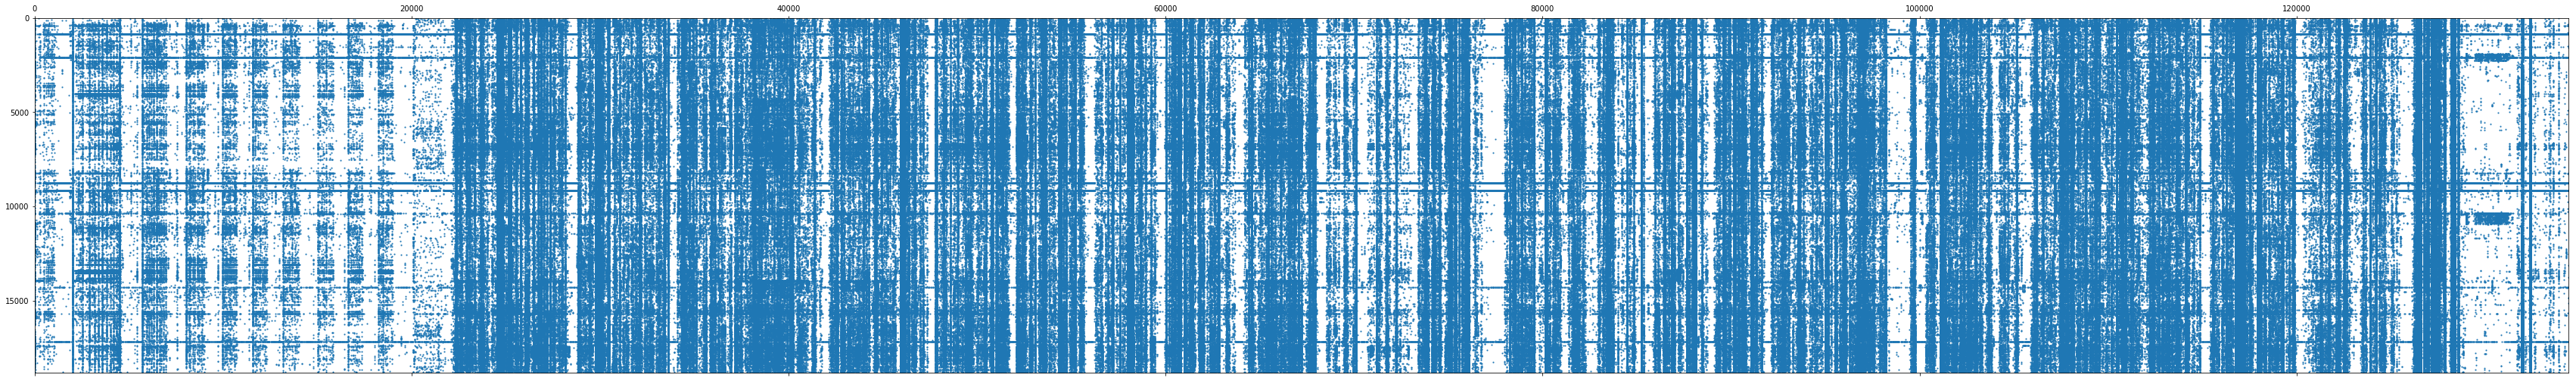

In [28]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(newsgroups.filenames)
print(newsgroups.filenames[indices])
print(indices)

plt.spy(vectors[indices], markersize=1)
fig = plt.gcf()
fig.set_size_inches(60,60)
plt.plot()
plt.show()

# Exercise 3 (part 1/3)


1. Download the mushroom dataset here: [https://archive.ics.uci.edu/ml/datasets/Mushroom]
2. Create a new jupyter notebook
3. Load the dataset from CSV into pandas
4. Explore the distributions in the data. Show some examples.
5. The data is entirely categorical. Convert each feature to dummy variables.
6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.